### Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import *

### Get data

In [2]:
today_date = str(date.today())
share_names = ["AAPL", "NVDA", "TSLA", "AMZN", "META", "MSFT", "GOOG"]
df = yf.download(share_names, start = '2022-01-01', end = today_date)

[*********************100%%**********************]  7 of 7 completed


In [3]:
returns = df['Adj Close'].pct_change().dropna()

weight = [1/len(share_names)]
eq_weights = pd.DataFrame(len(share_names)* weight, index = share_names, columns = ['Weights'])
portfolio_value = 1

### Equally weighted portfolio

In [4]:
def eq_portfolio(returns):
    weight = [1/len(share_names)]
    eq_weights = pd.DataFrame(len(share_names)* weight, index = share_names, columns = ['Weights'])
    
    portfolio_return_break_down = returns * eq_weights.T.values
    portfolio_returns = portfolio_return_break_down.sum(axis = 1).to_frame(name = 'Portfolio Returns')
    portfolio_cumul_return = (portfolio_returns+1).cumprod()
    
    
    return portfolio_cumul_return

In [5]:
eq_portfolio(returns)

,Portfolio Returns
Date,
2022-01-04,0.981907
2022-01-05,0.942845
2022-01-06,0.941875
2022-01-07,0.931478
2022-01-10,0.935534
...,...
2024-04-15,1.245272
2024-04-16,1.239544
2024-04-17,1.225261


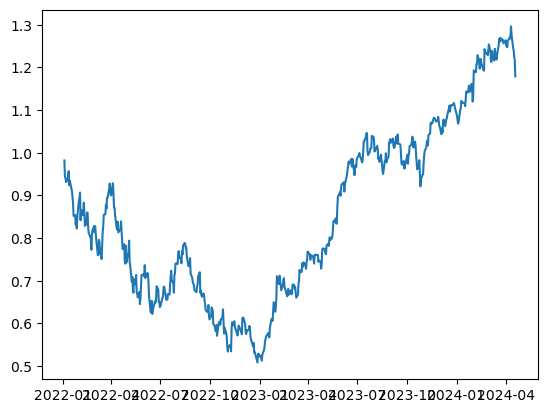

In [6]:
plt.plot(eq_portfolio(returns))

### Volatility Weighted Portfolio

In this portfolio, the weight of asset "i" is equal to :
$$
\frac{\frac{1}{\phi_\text{i}^2}}{\sum_{k=1}^{n} \frac{1}{\phi_\text{k}^2}}
$$






In [7]:
def vol_weight(returns, frequency):
    
    "Computation of the rolling returns"
    roll_vol = returns.rolling(frequency).std().dropna()
    
    "Computation of the weights"
    numerators = 1/roll_vol**2        # 1/vol^2
    denominator = numerators.sum(axis = 1)  #Une seule colonne avec somme(1/vols)
    weights = numerators.div(denominator, axis = 0)
    
    "Computation of the weighted returns"
    
    portfolio_return_break_down = returns * weights
    portfolio_returns = portfolio_return_break_down.sum(axis = 1).to_frame(name = 'Portfolio Returns')
    portfolio_cumul_return = (portfolio_returns+1).cumprod()
    
    return portfolio_cumul_return

In [8]:
vol_weight(returns, 32)

,Portfolio Returns
Date,
2022-01-04,1.000000
2022-01-05,1.000000
2022-01-06,1.000000
2022-01-07,1.000000
2022-01-10,1.000000
...,...
2024-04-15,1.321683
2024-04-16,1.317171
2024-04-17,1.306172


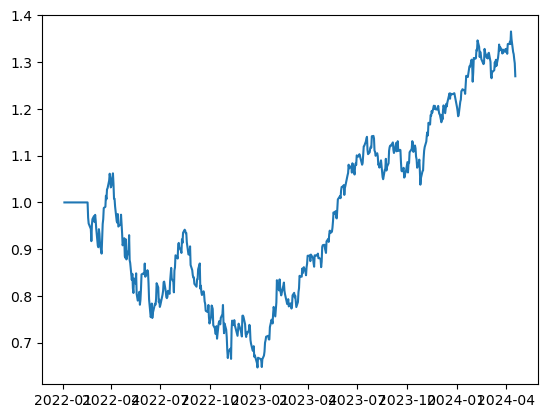

In [9]:
plt.plot(vol_weight(returns, 32))

### Mean Variance Weighted Portfolio

For this portfolio we have a weight equal to : 

$$
\frac{V^{-1} \cdot \mu}{1^t \cdot V^{-1} \cdot \mu}
$$

In [14]:
def mean_var_weighted_port(returns):
    
    "Computation of the matrices and vectors we will need"
    cov_matrix = returns.cov()
    inv_cov_matrix = pd.DataFrame(np.linalg.inv(cov_matrix))
    mean_matrix = returns.mean()
    ones_vector = [1]*len(share_names)
    
    "Computation of the weights"
    numerator = np.dot(inv_cov_matrix, mean_matrix.values)
    denominator = np.dot(ones_vector, numerator)
    weights = numerator / denominator
    
    "Computation of the weighted returns"
    portfolio_return_break_down = returns * weights
    portfolio_returns = portfolio_return_break_down.sum(axis = 1).to_frame(name = 'Portfolio Returns')
    portfolio_cumul_return = (portfolio_returns+1).cumprod()
    
    
    return portfolio_cumul_return

,Portfolio Returns
Date,
2022-01-04,9.686301e-01
2022-01-05,1.050600e+00
2022-01-06,7.086219e-01
2022-01-07,7.642224e-01
2022-01-10,8.406482e-01
...,...
2024-04-15,-7.894031e-12
2024-04-16,-5.631369e-12
2024-04-17,-6.718905e-12


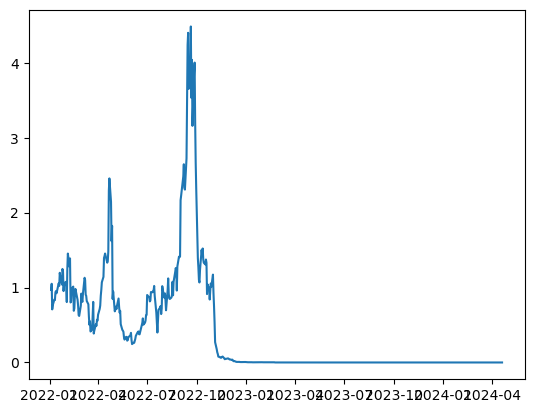

In [17]:
plt.plot(mean_var_weighted_port(returns))
mean_var_weighted_port(returns)